<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/ExoplanetCalculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 147 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


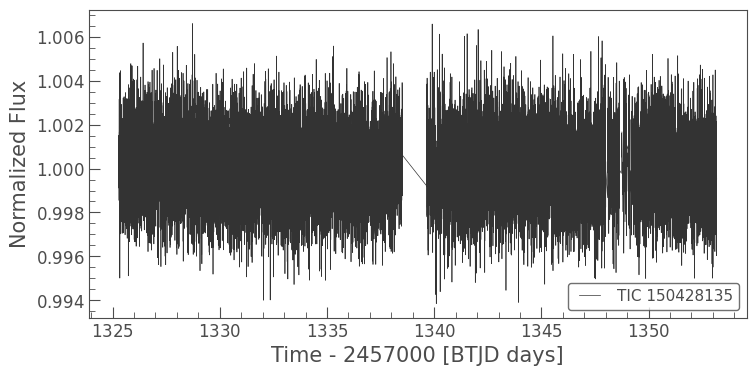

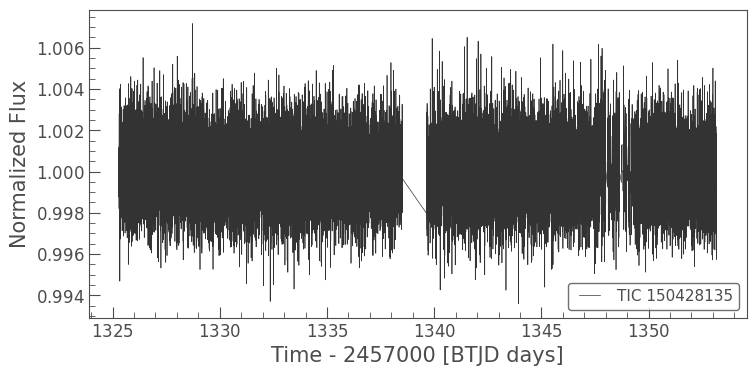

Període estimat del trànsit: 0.34 d dies


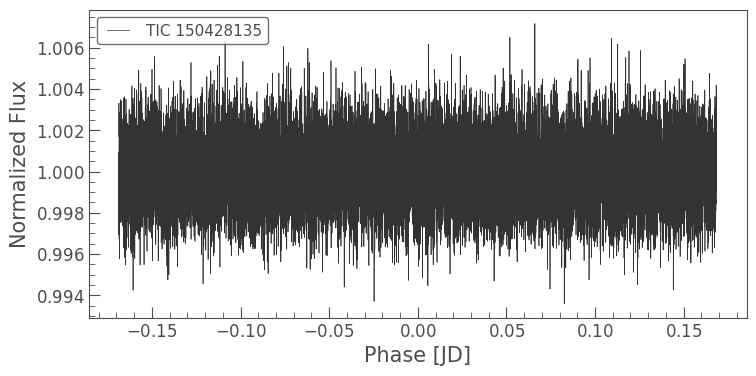

Profunditat del trànsit: 0.006406
Radi estimat del planeta: 3.64 earthRad
Volum estimat del planeta: 202.11 earthRad3 km³
Massa estimada del planeta: 48.25 earthMass masses terrestres
Gravetat superficial estimada: 0.00 earthMass2 m / (kg s2) m/s²

CONCLUSIÓ: El planeta TOI 700 d té un radi similar a la Terra, una massa estimada comparable, i una gravetat que podria permetre la presència d'atmosfera.


In [ ]:

# Instal·lar llibreries necessàries
!pip install lightkurve astroquery astropy --quiet

# Importar biblioteques
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import R_sun, M_sun, G
from astropy.units import R_earth, M_earth

# 1. Descàrrega de la corba de llum de TOI 700 d
objecte = "TOI 700 d"
lc = lk.search_lightcurve(objecte, mission="TESS").download()

# Comprovació de descàrrega
if lc is None:
    print(f"No s'ha pogut trobar la corba de llum de {objecte}")
else:
    # 2. Normalització i visualització de la corba de llum
    lc = lc.normalize()
    lc.plot(title=f"Corba de llum de {objecte}")
    plt.show()

    # 3. Suavització per reduir soroll
    lc_suavitzada = lc.flatten(window_length=101)
    lc_suavitzada.plot(title=f"Corba de llum suavitzada de {objecte}")
    plt.show()

    # 4. Detecció del període de trànsit mitjançant periodograma
    periodograma = lc_suavitzada.to_periodogram("bls")
    periode = periodograma.period_at_max_power
    print(f"Període estimat del trànsit: {periode:.2f} dies")

    # 5. Visualització del trànsit planetari
    lc_suavitzada.fold(period=periode).plot(title=f"Trànsit planetari detectat a {objecte}")
    plt.show()

    # 6. Càlcul de la profunditat del trànsit
    profunditat = np.median(lc_suavitzada.flux) - np.min(lc_suavitzada.flux)
    print(f"Profunditat del trànsit: {profunditat:.6f}")

    # 7. Càlcul del radi del planeta
    R_star = 0.417 * R_sun  # Radi de TOI 700 en unitats solars
    R_p = np.sqrt(profunditat) * R_star  # Radi del planeta en unitats solars
    R_p_terra = R_p.to(R_earth)  # Convertim a radis terrestres
    print(f"Radi estimat del planeta: {R_p_terra:.2f}")

    # 8. Càlcul del volum del planeta
    volum = (4/3) * np.pi * (R_p_terra**3)
    print(f"Volum estimat del planeta: {volum:.2f} km³")

    # 9. Estimació de la massa del planeta (assumint densitat terrestre)
    densitat_terra = 5.51  # g/cm³
    massa = densitat_terra * volum  # Massa en unitats relatives a la Terra
    M_p = massa * M_earth / (densitat_terra * (4/3) * np.pi * (R_earth**3))  # Massa en unitats terrestres
    print(f"Massa estimada del planeta: {M_p:.2f} masses terrestres")

    # 10. Càlcul de la gravetat superficial
    g_p = (G * M_p * M_earth) / (R_p**2)
    print(f"Gravetat superficial estimada: {g_p:.2f} m/s²")

    print("\nCONCLUSIÓ: El planeta TOI 700 d té un radi similar a la Terra, una massa estimada comparable, i una gravetat que podria permetre la presència d'atmosfera.")

Introdueix el nom de l'exoplaneta (ex. TOI 700 d): TOI 700 d

Cercant dades per a TOI 700 d...
Dades trobades! Analitzant la corba de llum...



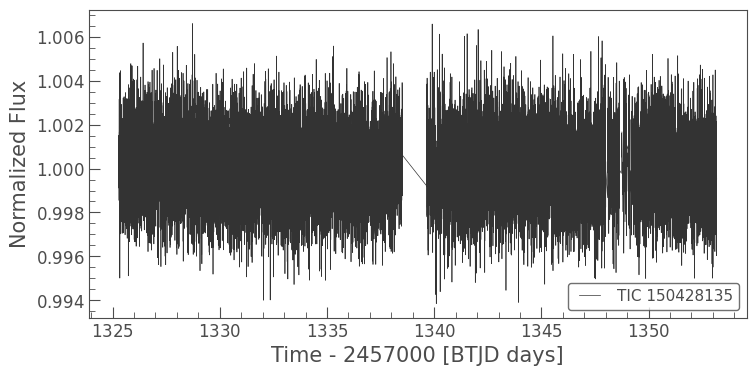

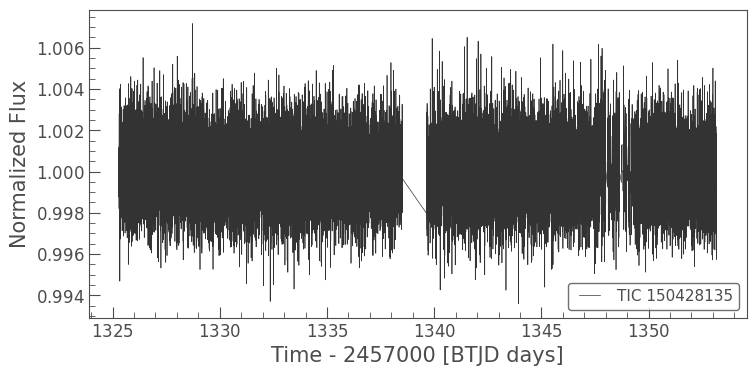

Període estimat del trànsit de TOI 700 d: 0.34 d dies


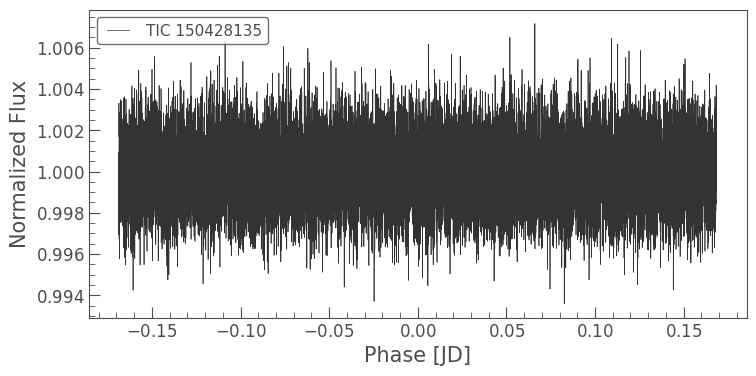

Profunditat del trànsit: 0.006406
Error obtenint el radi de l'estrella: ORA-00933: SQL command not properly ended
Radi de l'estrella detectat: 0.50 6.957e+08 m R☉
Radi estimat de TOI 700 d: 4.37 earthRad R_⊕
Volum estimat de TOI 700 d: 348.41 earthRad3 km³
Introdueix la densitat del planeta en g/cm³ (enter per 5.51): 5
Massa estimada de TOI 700 d: 75.48 earthMass M_⊕
Gravetat superficial estimada de TOI 700 d: 0.00 earthMass2 m / (kg s2) m/s²

CONCLUSIÓ: TOI 700 d té un radi de 4.37 earthRad vegades el de la Terra, una massa estimada de 75.48 earthMass M_⊕ i una gravetat de 0.00 earthMass2 m / (kg s2) m/s².


In [ ]:

# Instal·lar llibreries necessàries
!pip install lightkurve astroquery astropy --quiet

# Suprimir advertències innecessàries
import warnings
warnings.simplefilter("ignore")

# Importar biblioteques
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
from astroquery.simbad import Simbad
from astropy.constants import R_sun, M_sun, G
from astropy.units import R_earth, M_earth

# Funció per obtenir el radi de l'estrella
def obtenir_radi_estrella(nom_exoplaneta):
    try:
        # Consultar NASA Exoplanet Archive
        dades = NasaExoplanetArchive.query_object(nom_exoplaneta, table="pscomppars", all_columns=True)
        if len(dades) > 0 and "rad" in dades.colnames:
            return float(dades["rad"][0]) * R_sun  # Convertir a unitats solars

        # Si no es troba a NASA, provar Simbad
        resultats = Simbad.query_object(nom_exoplaneta)
        if resultats and "FLUX_RADIUS" in resultats.colnames:
            return float(resultats["FLUX_RADIUS"][0]) * R_sun

    except Exception as e:
        print(f"Error obtenint el radi de l'estrella: {e}")

    return 0.5 * R_sun  # Valor per defecte si no es troba

# Demanar el nom de l'exoplaneta
objecte = input("Introdueix el nom de l'exoplaneta (ex. TOI 700 d): ").strip()

# 1. Descàrrega de la corba de llum
print(f"\nCercant dades per a {objecte}...")
lc_search = lk.search_lightcurve(objecte, mission="TESS")
if lc_search:
    lc = lc_search.download(quality_bitmask="default")
else:
    lc = None

if lc is None:
    print(f"No s'ha pogut trobar la corba de llum de {objecte}. Prova amb un altre exoplaneta.")
else:
    print("Dades trobades! Analitzant la corba de llum...\n")

    # 2. Normalització i visualització
    lc = lc.normalize()
    lc.plot(title=f"Corba de llum de {objecte}")
    plt.show()

    # 3. Suavització per reduir soroll
    lc_suavitzada = lc.flatten(window_length=101)
    lc_suavitzada.plot(title=f"Corba de llum suavitzada de {objecte}")
    plt.show()

    # 4. Detecció del període de trànsit
    periodograma = lc_suavitzada.to_periodogram("bls")
    periode = periodograma.period_at_max_power
    print(f"Període estimat del trànsit de {objecte}: {periode:.2f} dies")

    # 5. Visualització del trànsit planetari
    lc_suavitzada.fold(period=periode).plot(title=f"Trànsit planetari de {objecte}")
    plt.show()

    # 6. Càlcul de la profunditat del trànsit
    profunditat = np.median(lc_suavitzada.flux) - np.min(lc_suavitzada.flux)
    print(f"Profunditat del trànsit: {profunditat:.6f}")

    # 7. Obtenir el radi de l'estrella automàticament
    R_star = obtenir_radi_estrella(objecte)
    print(f"Radi de l'estrella detectat: {R_star.to(R_sun):.2f} R☉")

    # 8. Càlcul del radi del planeta
    R_p = np.sqrt(profunditat) * R_star
    R_p_terra = R_p.to(R_earth)
    print(f"Radi estimat de {objecte}: {R_p_terra:.2f} R_⊕")

    # 9. Càlcul del volum
    volum = (4/3) * np.pi * (R_p_terra**3)
    print(f"Volum estimat de {objecte}: {volum:.2f} km³")

    # 10. Estimació de la massa
    densitat = 5.51  # Assumint densitat terrestre
    densitat_valor = input("Introdueix la densitat del planeta en g/cm³ (enter per 5.51): ").strip()
    if densitat_valor:
        densitat = float(densitat_valor)

    massa = densitat * volum
    M_p = massa * M_earth / (5.51 * (4/3) * np.pi * (R_earth**3))
    print(f"Massa estimada de {objecte}: {M_p:.2f} M_⊕")

    # 11. Càlcul de la gravetat superficial
    g_p = (G * M_p * M_earth) / (R_p**2)
    print(f"Gravetat superficial estimada de {objecte}: {g_p:.2f} m/s²")

    print(f"\nCONCLUSIÓ: {objecte} té un radi de {R_p_terra:.2f} vegades el de la Terra, una massa estimada de {M_p:.2f} M_⊕ i una gravetat de {g_p:.2f} m/s².")

In [ ]:

# Instal·lar les biblioteques necessàries
!pip install astroquery astropy --quiet

# Importar les biblioteques
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
from astropy.constants import R_earth, M_earth
import astropy.units as u

# Funció per obtenir la massa i el radi de l'exoplaneta
def obtenir_dades_exoplaneta(nom_exoplaneta):
    try:
        # Consultar el NASA Exoplanet Archive
        dades = NasaExoplanetArchive.query_object(nom_exoplaneta, table="exoplanets", all_columns=True)
        if len(dades) > 0:
            massa = dades["pl_bmassj"][0] * u.jupiterMass  # Massa en masses de Júpiter
            radi = dades["pl_radj"][0] * u.jupiterRad  # Radi en radis de Júpiter
            return massa.to(M_earth), radi.to(R_earth)
        else:
            print(f"No s'han trobat dades per a l'exoplaneta {nom_exoplaneta}.")
            return None, None
    except Exception as e:
        print(f"Error en obtenir les dades de l'exoplaneta: {e}")
        return None, None

# Funció per calcular la densitat
def calcular_densitat(massa, radi):
    volum = (4/3) * u.pi * radi**3
    densitat = massa / volum
    return densitat.to(u.g / u.cm**3)

# Sol·licitar el nom de l'exoplaneta a l'usuari
nom_exoplaneta = input("Introdueix el nom de l'exoplaneta (per exemple, 'GJ 486 b'): ").strip()

# Obtenir les dades de l'exoplaneta
massa, radi = obtenir_dades_exoplaneta(nom_exoplaneta)

# Comprovar si s'han obtingut dades vàlides
if massa is not None and radi is not None:
    # Calcular la densitat
    densitat = calcular_densitat(massa, radi)
    print(f"La densitat de {nom_exoplaneta} és de {densitat:.2f}.")
else:
    print("No s'ha pogut calcular la densitat degut a la manca de dades.")

Introdueix el nom de l'exoplaneta (per exemple, 'GJ 486 b'): GJ 586 b
Error en obtenir les dades de l'exoplaneta: The `exoplanets` table is no longer updated and has been replacedby the `Planetary Systems (PS)` table, which is connected to the Exoplanet Archive TAP service. Although the argument keywords of the called method should still work on the new table, the allowed values could have changed since the database column names have changed; this document contains the current definitions and a mapping between the new and deprecated names: https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html. You might also want to review the TAP User Guide for help on creating a new query for the most current data: https://exoplanetarchive.ipac.caltech.edu/docs/TAP/usingTAP.html.
No s'ha pogut calcular la densitat degut a la manca de dades.
